#**Introdução** 

***Desafio kaggle Heart Disease***

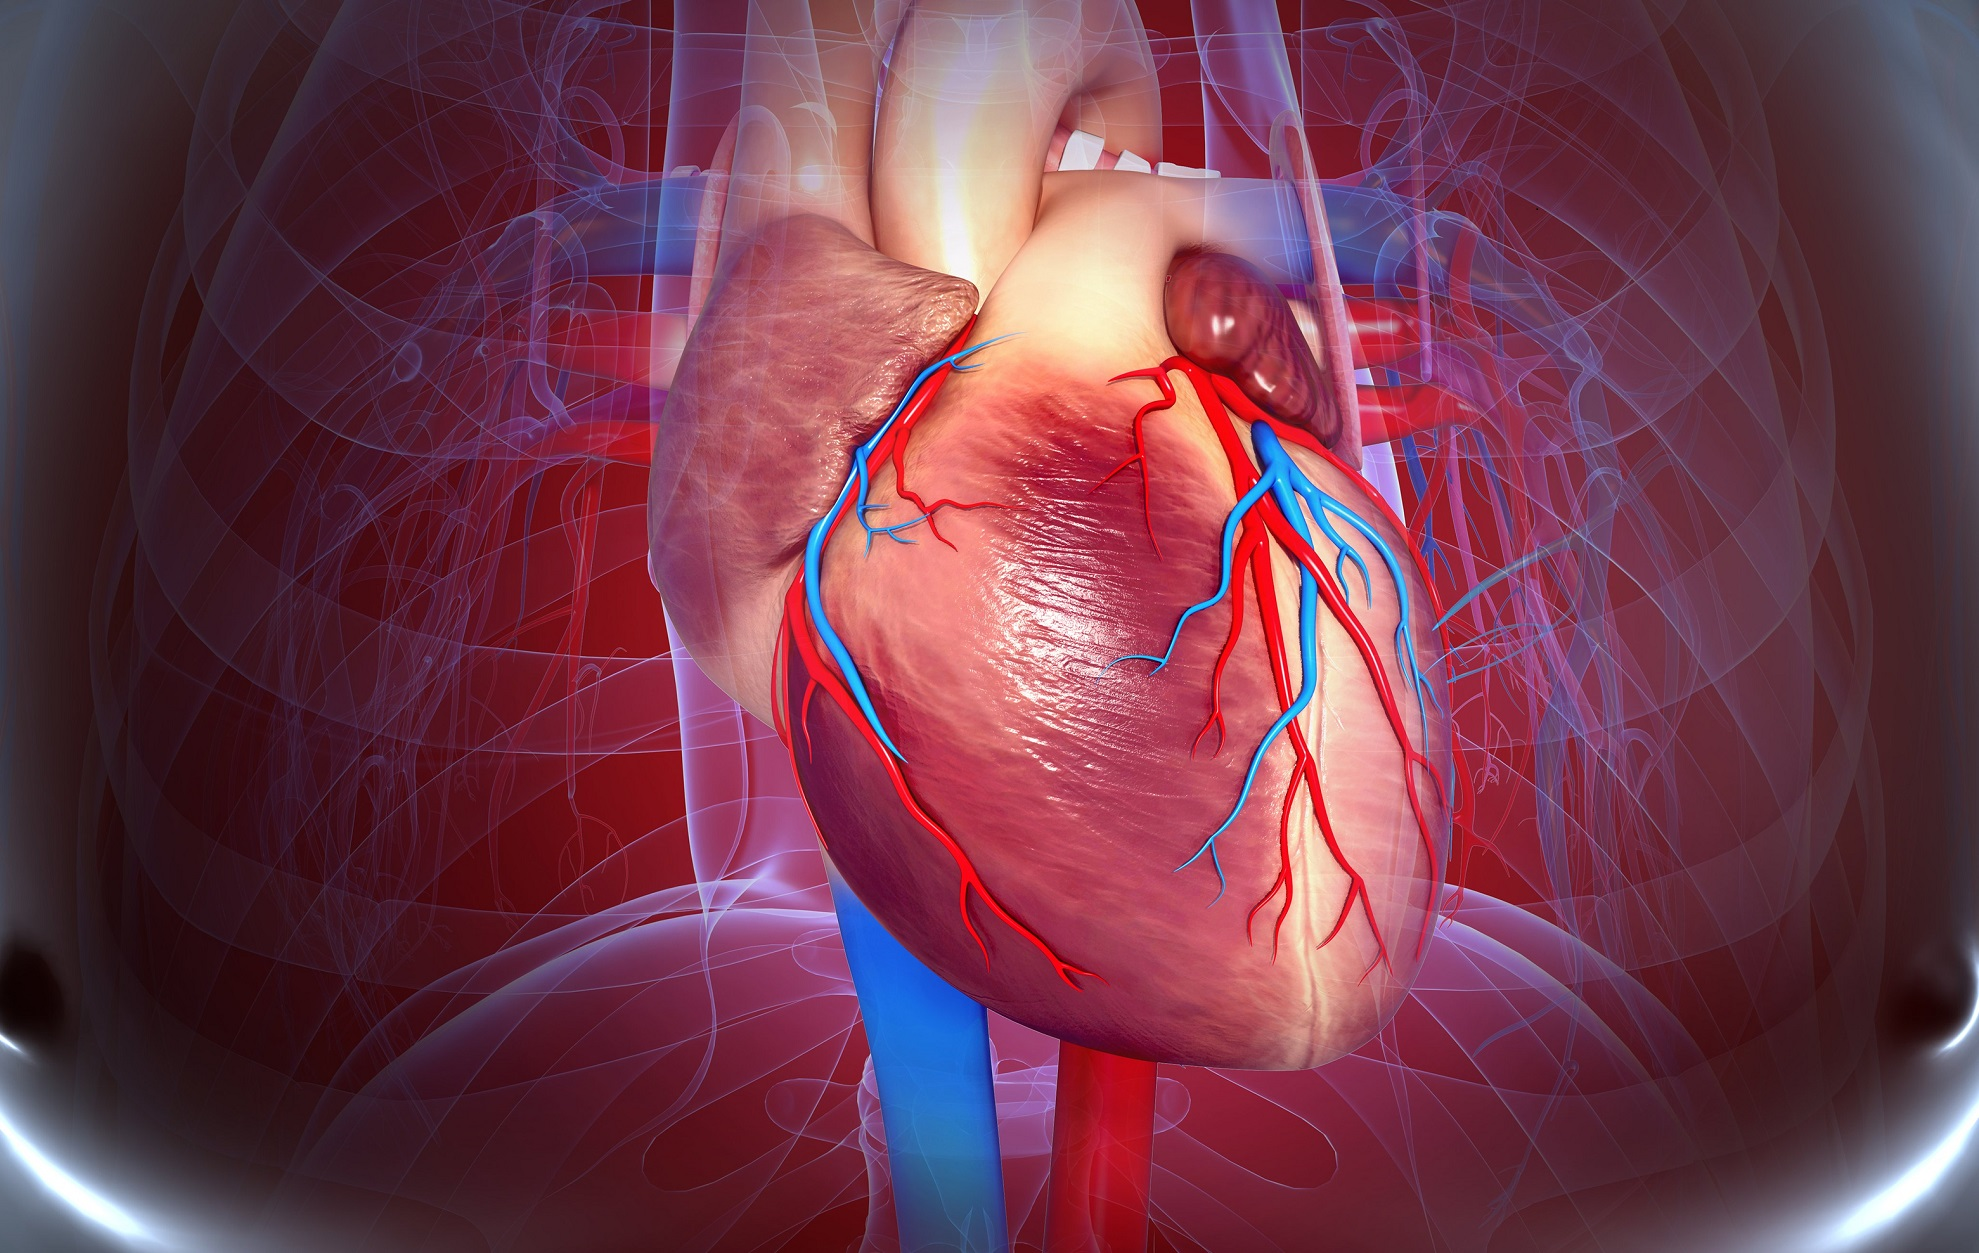

Importando Bibliotecas 

In [1]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

---

**Heart Disease**

Attribute Information:



*   Age
*   Sex
*   chest pain type (4 values)
*   resting blood pressure
*   serum cholestoral in mg/dl
*   fasting blood sugar > 120 mg/dl
*   resting electrocardiographic results (values 0,1,2)
*   maximum heart rate achieved
*   exercise induced angina
*   oldpeak = ST depression induced by exercise relative to rest
*   the slope of the peak exercise ST segment
*   number of major vessels (0-3) colored by flourosopy
*   thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.












---



In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.duplicated().sum()

723

In [6]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [7]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


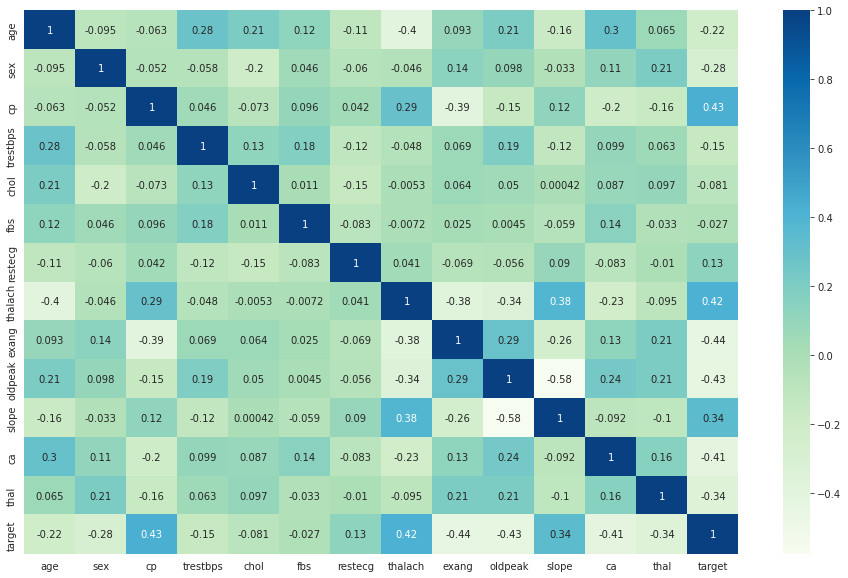

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(hd.corr(), annot= True, cmap = 'GnBu')



---



In [11]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [12]:
for c in hd.columns:
  print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [13]:
categoricas = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numericas = ['age','trestbps','chol','thalach','oldpeak']

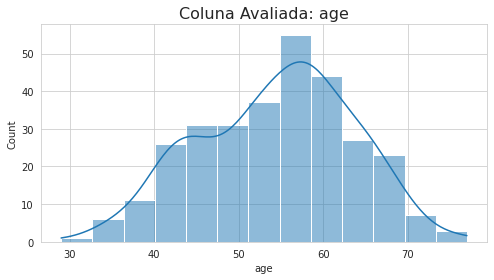

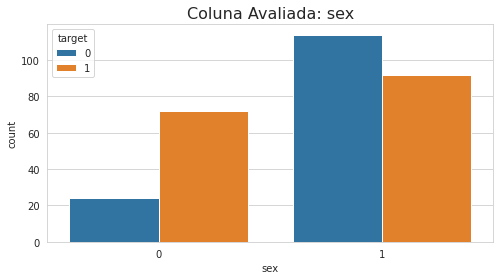

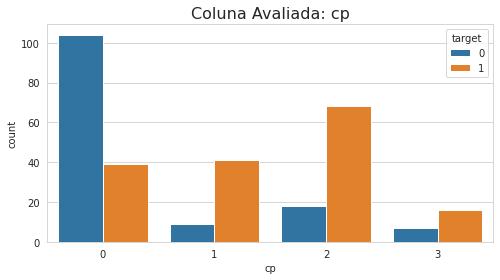

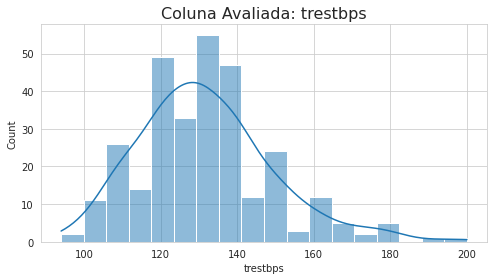

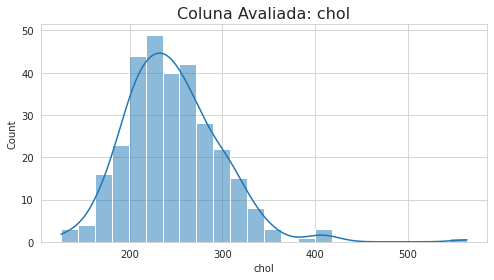

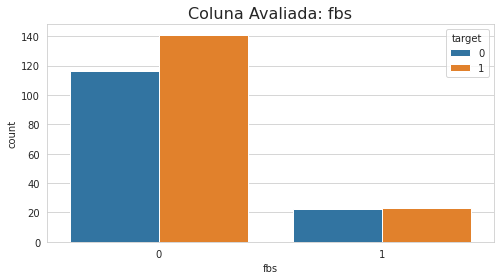

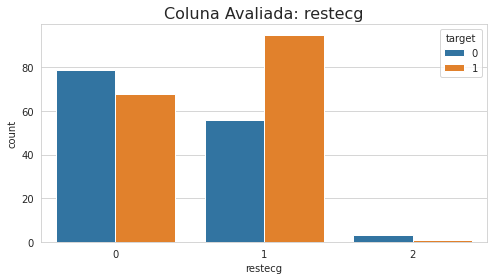

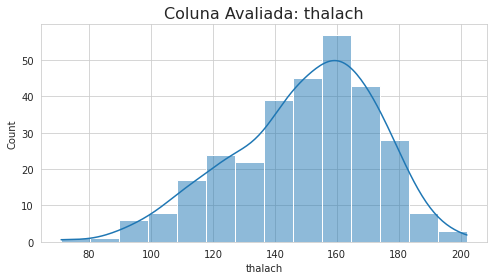

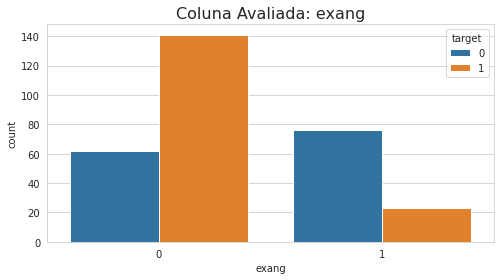

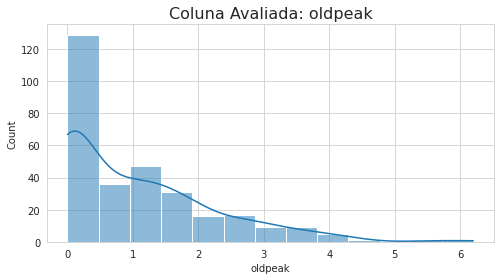

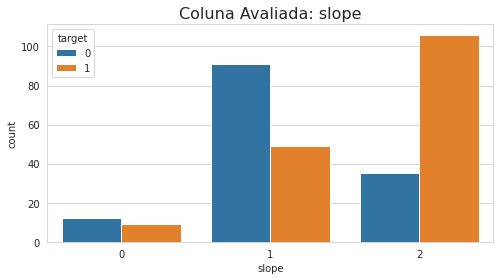

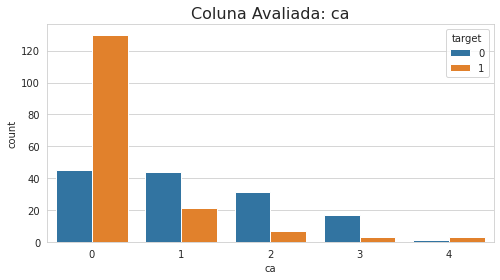

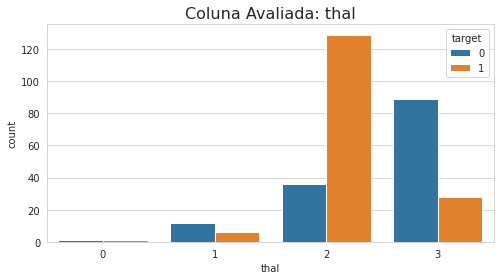

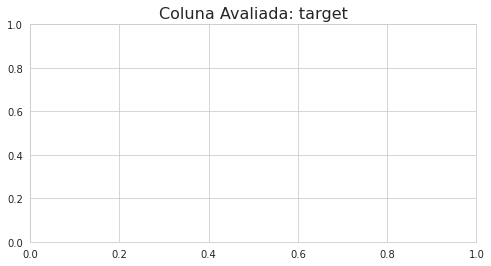

In [14]:
for c in hd.columns:
  plt.figure(figsize= (8,4))
  plt.title(f"Coluna Avaliada: {c}", fontsize = 16)
  if c in categoricas:
    sns.countplot(x= hd[c], hue = hd['target'])
  if c in numericas:
    sns.histplot(hd[c], kde = True)  

# **Removendo Outliers**

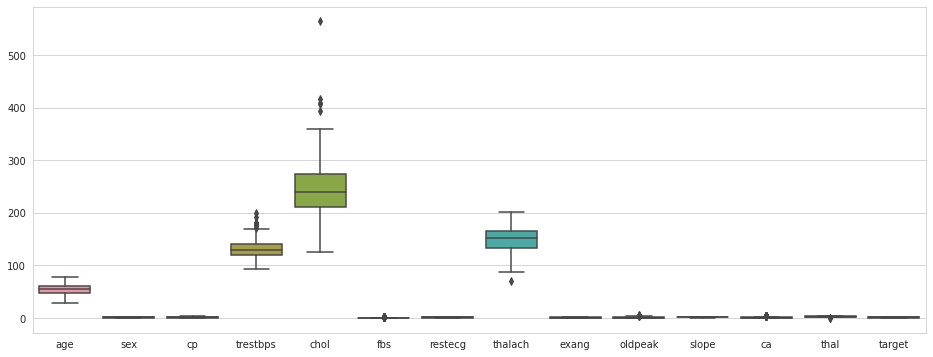

In [15]:
plt.figure(figsize= (16,6))
sns.boxplot(data = hd)

In [16]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
hd['trestbps'].quantile(0.99)

180.0

In [24]:
hd1 = hd[hd["trestbps"] < hd['trestbps'].quantile(0.99)]

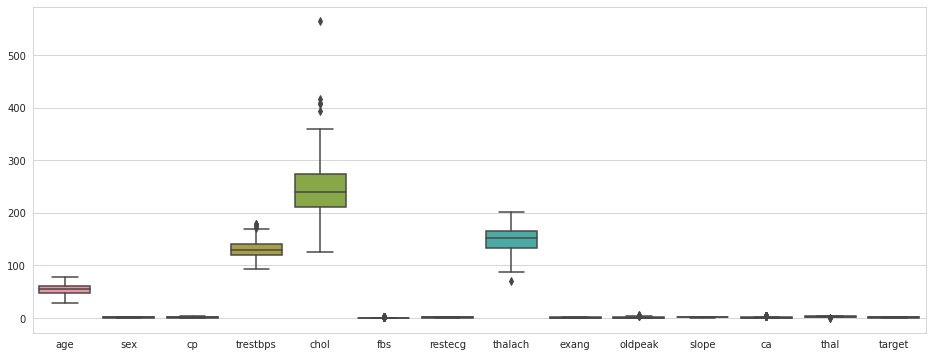

In [25]:
plt.figure(figsize= (16,6))
sns.boxplot(data = hd1)

In [21]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [26]:
hd2 = hd1[hd1["chol"] < hd1['chol'].quantile(0.98)]

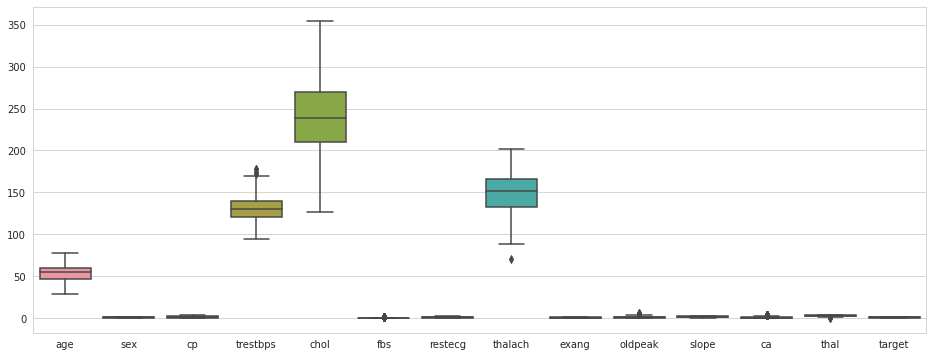

In [27]:
plt.figure(figsize= (16,6))
sns.boxplot(data = hd2)

In [28]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
hd2['thalach'].quantile(0.005)

88.9

In [30]:
hd3 = hd2[hd2["thalach"] > hd2['thalach'].quantile(0.005)]

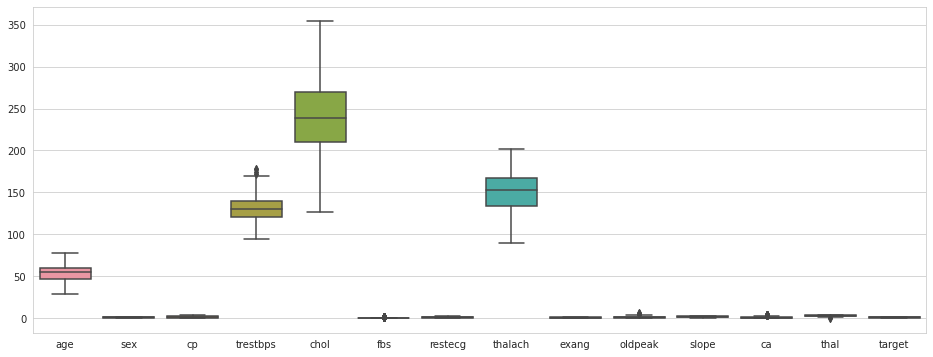

In [31]:
plt.figure(figsize= (16,6))
sns.boxplot(data = hd3)



---



In [ ]:
categoricas = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numericas = ['age','trestbps','chol','thalach','oldpeak']

In [36]:
hd4 = pd.get_dummies(hd3, columns= ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0




---



#**Machine Learning**

In [37]:
hd4.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [40]:
X = hd4.drop('target', axis= 1)
y = hd4['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Algoritimo *LogisticRegression*

In [44]:
log = LogisticRegression(max_iter=1000)

In [45]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
log.score(X_train, y_train)

0.8744588744588745

In [47]:
log.score(X_test, y_test)

0.8448275862068966

In [48]:
######
y_previsto = log.predict(X_test)

In [49]:
accuracy_score(y_test, y_previsto)

0.8448275862068966

In [50]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [51]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]])



---



In [52]:
def relatorio_ml(df, algoritimo, opt = 2):
  X = df.drop('target', axis= 1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  if opt == 0:
    ml = algoritimo(max_iter = 1000)
  elif opt == 1:
    ml = algoritimo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritimo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acuracia treino:{score_train*100:.2f}%")
  score_teste = ml.score(X_test, y_test)
  print(f"Acuracia teste:{score_teste*100:.2f}%") 

  y_previsto = log.predict(X_test)
  print("--- CLASSIFICATION REPORT ---")
  print(classification_report(y_test, y_previsto))
  print("--- CONFUSION MATRIX ---")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_teste


Acuracia treino:87.45%
Acuracia teste:84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


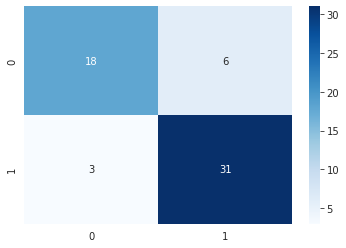

In [53]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)

Acuracia treino:100.00%
Acuracia teste:72.41%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


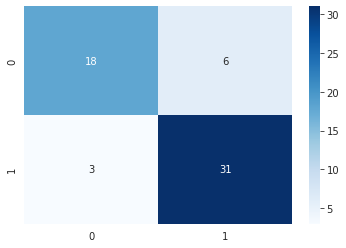

In [55]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

Acuracia treino:93.51%
Acuracia teste:82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


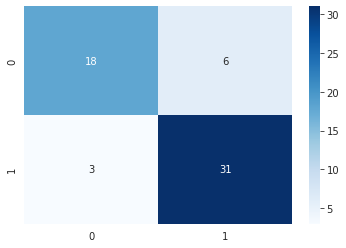

In [56]:
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)

Acuracia treino:77.06%
Acuracia teste:60.34%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


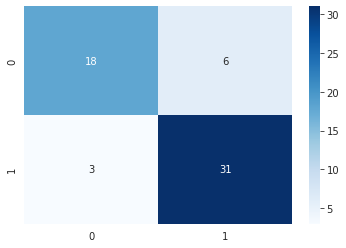

In [57]:
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier)

Acuracia treino:100.00%
Acuracia teste:82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


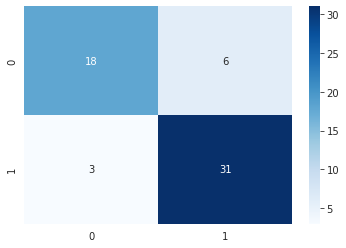

In [58]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [59]:
data = { 'Models' : ['LogisticRegression','DecisionTree','KNeighbords','RandomForestClassifier','AdaBoost'],
        'Acurácia Treino': [round(log_train * 100,2), round(tree_train * 100*2), round(kn_train * 100,2), 
                          round(rand_train * 100,2), round(ada_train * 100,2)],
        'Acurácia Teste':[round(log_test * 100,2), round(tree_test * 100*2), round(kn_test * 100,2), 
                        round(rand_test * 100,2), round(ada_test * 100,2)],
    }

df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace=True)
df    

,Models,Acurácia Treino,Acurácia Teste
1,DecisionTree,200.00,145.00
0,LogisticRegression,87.45,84.48
3,RandomForestClassifier,100.00,82.76
4,AdaBoost,93.51,82.76
2,KNeighbords,77.06,60.34




---



**StandardScaler**

In [70]:
def relatorio_ml_scaler(df, algoritimo, opt = 2):
  X = df.drop('target', axis= 1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  scaler = StandardScaler()
  cols_scaler = ['age','trestbps','chol','thalach','oldpeak']
  X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
  X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

  if opt == 0:
    ml = algoritimo(max_iter = 1000)
  elif opt == 1:
    ml = algoritimo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritimo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acuracia treino:{score_train*100:.2f}%")
  score_teste = ml.score(X_test, y_test)
  print(f"Acuracia teste:{score_teste*100:.2f}%") 

  y_previsto = log.predict(X_test)
  print("--- CLASSIFICATION REPORT ---")
  print(classification_report(y_test, y_previsto))
  print("--- CONFUSION MATRIX ---")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot = True, cmap = 'GnBu')

  return score_train, score_teste


Acuracia treino:87.45%
Acuracia teste:84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


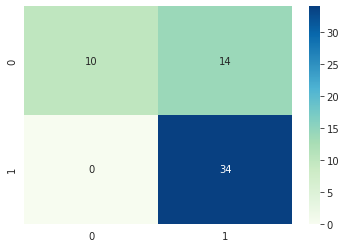

In [71]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression, opt = 0)

Acuracia treino:100.00%
Acuracia teste:74.14%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


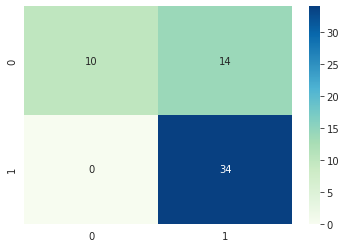

In [72]:
tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(hd4, DecisionTreeClassifier)

Acuracia treino:93.51%
Acuracia teste:82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


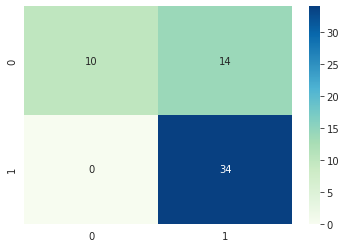

In [73]:
ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(hd4, AdaBoostClassifier)

Acuracia treino:87.45%
Acuracia teste:79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


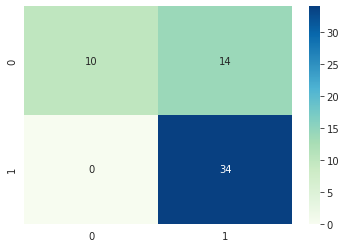

In [74]:
kn_train_scaler, kn_test_scaler = relatorio_ml_scaler(hd4, KNeighborsClassifier)

Acuracia treino:100.00%
Acuracia teste:82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


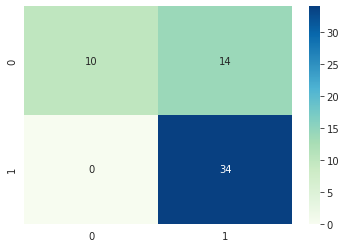

In [75]:
rand_train_scaler, rand_test_scaler = relatorio_ml_scaler(hd4, RandomForestClassifier)

In [78]:
data_scaler = { 'Models' : ['LogisticRegression','DecisionTree','KNeighbords','RandomForestClassifier','AdaBoost'],
        'Acurácia Treino': [round(log_train_scaler * 100,2), round(tree_train_scaler * 100*2), round(kn_train_scaler * 100,2), 
                          round(rand_train_scaler * 100,2), round(ada_train_scaler * 100,2)],
        'Acurácia Teste':[round(log_test_scaler * 100,2), round(tree_test_scaler * 100*2), round(kn_test_scaler * 100,2), 
                        round(rand_test_scaler * 100,2), round(ada_test_scaler * 100,2)],
    }

df_scaler = pd.DataFrame(data_scaler)
df_scaler.sort_values(by='Acurácia Teste', ascending=False, inplace=True)

***Com Scaler***

In [79]:
df_scaler

,Models,Acurácia Treino,Acurácia Teste
1,DecisionTree,200.00,148.00
0,LogisticRegression,87.45,84.48
3,RandomForestClassifier,100.00,82.76
4,AdaBoost,93.51,82.76
2,KNeighbords,87.45,79.31


***Sem Scaler***

In [77]:
df

,Models,Acurácia Treino,Acurácia Teste
1,DecisionTree,200.00,145.00
0,LogisticRegression,87.45,84.48
3,RandomForestClassifier,100.00,82.76
4,AdaBoost,93.51,82.76
2,KNeighbords,77.06,60.34
